In [2]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# plotting token distribution


In [11]:


def token_plot(train_path, test_path, dataset_name, bins = 20):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    df_train = pd.read_csv(train_path) 
    df_test = pd.read_csv(test_path)
    df = pd.concat([df_train, df_test])
    df['tokens'] = df.apply(lambda x: len(tokenizer(x.text).input_ids), axis=1)
    print("mean of tokens:", df['tokens'].mean())
    print("std of tokens:", df['tokens'].std())
    x = df['tokens']
    plt.hist(x, bins = 20)
    plt.xlabel('#tokens')
    plt.ylabel('Frequency')
    plt.title(f'{dataset_name} Token Distribution Histogram',fontsize=10)
    plt.show()

mean of tokens: 72.13928458372902
std of tokens: 32.09742489450685


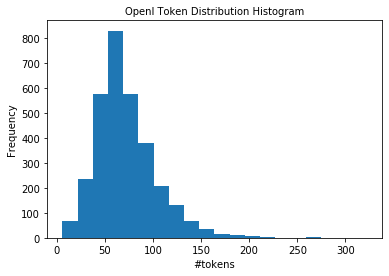

In [7]:
token_plot("../data/OpenI/openI_train.csv", "../data/OpenI/openI_test.csv", "OpenI")

this model (611 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (606 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (687 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (531 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (529 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing er

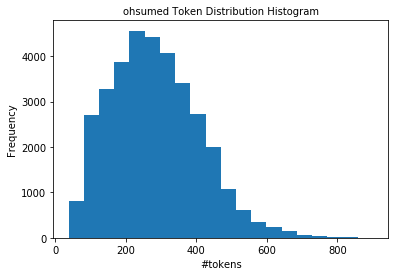

In [8]:
token_plot("../data/ohsumed/ohsumed_train.csv", "../data/ohsumed/ohsumed_test.csv", "ohsumed")

odel (599 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (653 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (860 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (799 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (600 > 512). Running this sequence through the model will result in indexing errors
T

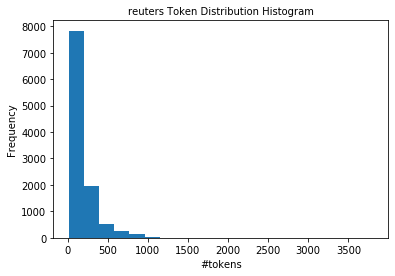

In [9]:
token_plot("../data/reuters/reuters_train.csv", "../data/reuters/reuters_test.csv", "reuters", bins = 20)

ing this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1599 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (851 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (780 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1455 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2038 > 512). Running this sequence through the model will result in indexing errors
Token indices sequen

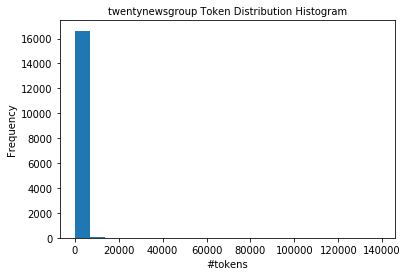

In [10]:
token_plot("../data/twentynewsgroup/twentynewsgroup_train.csv", "../data/twentynewsgroup/twentynewsgroup_test.csv", "twentynewsgroup")

# plotting label distribution (train dataset)

In [3]:
def plot_label_distro(labels, train_path, test_path, dataset_name):
    df = pd.read_csv(train_path)
    df['labels'] = df.apply(lambda row: ast.literal_eval(row['labels']), axis=1)


    
    label_counts = np.array(df.labels.to_list()).sum(axis=0)
    print("label_couts = ", list(label_counts))
    df_sorted = pd.DataFrame(list(zip(labels, label_counts)), columns=['labels', 'counts'])
    df_sorted = df_sorted.sort_values('counts')
    plt.bar('labels', 'counts',data=df_sorted , align='center', alpha=0.5)
    # plt.bar(labels, label_counts, align='center', alpha=0.5)
    plt.xticks(rotation=90)
    plt.ylabel('Labels')
    plt.xlabel("# of Labels")
    plt.title(f'Label distribution of {dataset_name} dataset')
    plt.show()

label_couts =  [100, 266, 219, 243, 300, 154, 94, 131, 84, 106, 89, 100, 89, 165, 226, 364, 140, 84, 212]


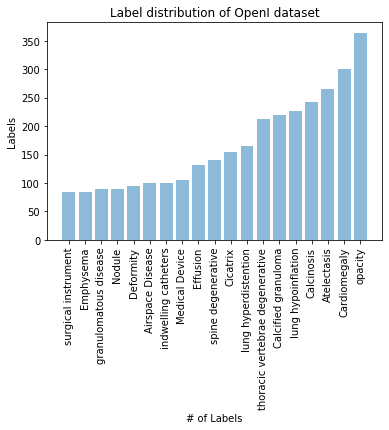

In [27]:
openI_labels = ['Airspace Disease', 'Atelectasis', 'Calcified granuloma', 'Calcinosis', 'Cardiomegaly', 'Cicatrix', 'Deformity', 'Effusion', 'Emphysema', 'Medical Device', 'Nodule', 'indwelling catheters', 'granulomatous disease', 'lung hyperdistention', 'lung hypoinflation', 'opacity', 'spine degenerative', 'surgical instrument', 'thoracic vertebrae degenerative']
train_path = "../data/OpenI/openI_train.csv"
plot_label_distro(openI_labels, train_path, "OpenI")

label_couts =  [2877, 1650, 538, 433, 389, 368, 347, 212, 197, 181, 140, 131, 126, 124, 111, 101, 94, 87, 78, 75]


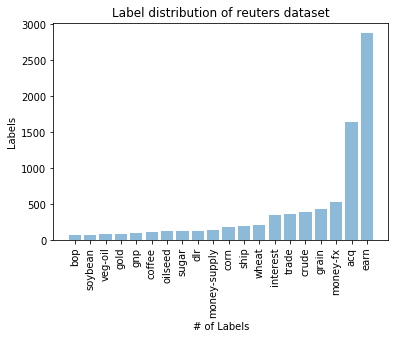

In [28]:
reuters_labels = ['earn', 'acq', 'money-fx', 'grain', 'crude', 'trade', 'interest', 'wheat', 'ship', 'corn', 'money-supply', 'dlr', 'sugar', 'oilseed', 'coffee', 'gnp', 'gold', 'veg-oil', 'soybean', 'bop']

train_path = "../data/reuters/reuters_train.csv"
plot_label_distro(reuters_labels, train_path, "reuters")

label_couts =  [937, 2071, 1298, 869, 1535, 1022, 7689, 405, 2014, 1342, 421, 342, 5062, 2346, 692, 798, 4882, 2032, 3081, 2493, 2391, 572, 1294]


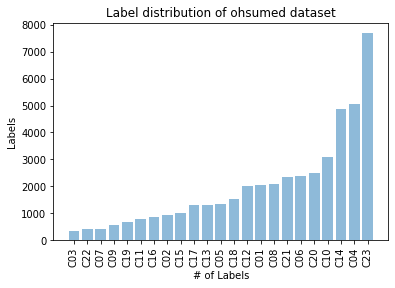

In [29]:
ohsumed_labels = ['C02', 'C08', 'C13', 'C16', 'C18', 'C15', 'C23', 'C22', 'C12', 'C05', 'C07', 'C03', 'C04', 'C21', 'C19', 'C11', 'C14', 'C01', 'C10', 'C20', 'C06', 'C09', 'C17']

train_path = "../data/ohsumed/ohsumed_train.csv"
plot_label_distro(ohsumed_labels, train_path, "ohsumed")

label_couts =  [593, 597, 546, 599, 377, 595, 594, 465, 591, 594, 578, 585, 600, 591, 593, 598, 564, 584, 480, 590]


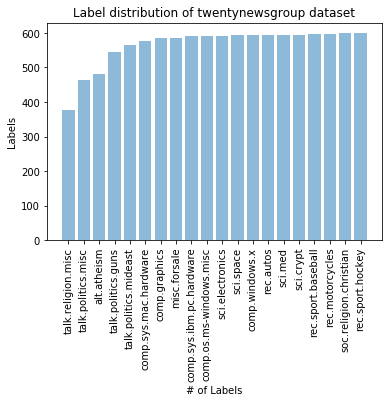

In [30]:
twentynewsgroup_labels = ['comp.windows.x', 'rec.sport.baseball', 'talk.politics.guns', 'soc.religion.christian', 'talk.religion.misc', 'sci.crypt', 'rec.autos', 'talk.politics.misc', 'sci.electronics', 'sci.med', 'comp.sys.mac.hardware', 'misc.forsale', 'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.space', 'rec.motorcycles', 'talk.politics.mideast', 'comp.graphics', 'alt.atheism', 'comp.sys.ibm.pc.hardware']

train_path = "../data/twentynewsgroup/twentynewsgroup_train.csv"

result = df1.append([df2, df3])

plot_label_distro(twentynewsgroup_labels, train_path, "twentynewsgroup")

label_couts =  [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 143, 146, 160, 160, 160, 160, 27, 160, 53, 160, 160]


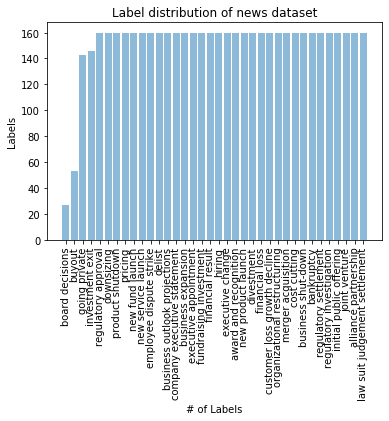

In [4]:
 news_labels = ['new service launch', 'executive change', 'award and recognition', 'new product launch', 'divestment', 'financial loss', 'customer loss growth decline', 'organizational restructuring', 'merger acquisition', 'cost cutting', 'business shut-down', 'bankruptcy', 'regulatory settlement', 'regulatory investigation', 'initial public offering', 'joint venture', 'hiring', 'financial result', 'fundraising investment', 'executive appointment', 'regulatory approval', 'downsizing', 'product shutdown', 'pricing', 'new fund launch', 'going private', 'investment exit', 'employee dispute strike', 'delist', 'business outlook projections', 'company executive statement', 'board decisions', 'business expansion', 'buyout', 'alliance partnership', 'law suit judgement settlement']

train_path = "../data/news/train.csv"
plot_label_distro(news_labels, train_path, "news")